### Walart Sales Forecasting
## Exploratory Data Analysis
### Problem:
There are many seasons that sales are significantly higher or lower than averages. If the company does not know about these seasons, it can lose too much money. Predicting future sales is one of the most crucial plans for a company. Sales forecasting gives an idea to the company for arranging stocks, calculating revenue, and deciding to make a new investment. Another advantage of knowing future sales is that achieving predetermined targets from the beginning of the seasons can have a positive effect on stock prices and investors' perceptions. Also, not reaching the projected target could significantly damage stock prices, conversely. And, it will be a big problem especially for Walmart as a big company.

## Aim:
My aim in this project is to build a model which predicts sales of the stores. With this model, Walmart authorities can decide their future plans which is very important for arranging stocks, calculating revenue and deciding to make new investment or not.
## Solution:
 With the accurate prediction company can;
- Determine seasonal demands and take action for this
- Protect from money loss because achieving sales targets can have a positive effect on stock prices and investors' perceptions
- Forecast revenue easily and accurately
- Manage inventories
- Do more effective campaigns

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

### Dataset information(Feature description)
- Store        : Store number
- Dept         : Department number
- Date         : Week
- Weekly_Sales : Sales for given dept in given store
- IsHoliday    : holiday or not
- Temperature  : Average temperature in the region
- Fuel_Price   : Cost of fuel in the region
- MarkDown1 to 5: Anonymized data related to promotional markdowns that Walmart is running.
- CPI          : Consumer price index
- Unemployement: Unemployement in the region

In [2]:
# Reading the data from all the given Datasets.

Sales_features=pd.read_csv('data/Sales_features.csv')
Sales_stores=pd.read_csv('data/Sales_stores.csv')
Sales_test=pd.read_csv('data/Sales_test.csv')
Sales_train=pd.read_csv('data/Sales_train.csv')


In [3]:
# Sales_featuers,Sales_stores and Sales_train contain some common features.
# Need to be merged for cerating the training dataset.

def showCols(data,name):
    print(name," : ",data.columns)
showCols(Sales_features,"Sales_features")
showCols(Sales_train,"Sales_train")
showCols(Sales_stores,"Sales_stores")
showCols(Sales_test,"Sales_test")


Sales_features  :  Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Sales_train  :  Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
Sales_stores  :  Index(['Store', 'Type', 'Size'], dtype='object')
Sales_test  :  Index(['Store', 'Dept', 'Date', 'IsHoliday'], dtype='object')


Datasets Sales_features and Sales_stores have 'Store' feature in common hence we need to merge the both datsets on Stores feature.<br>

In [4]:
dataset=Sales_features.merge(Sales_stores,how='inner',on='Store')

In [5]:
# Firstly we need to change the date format into year and week
dataset['year']=pd.DatetimeIndex(dataset['Date']).year ## Extracting 'year' data
dataset['week']=pd.DatetimeIndex(dataset['Date']).week ## Extracting 'week' data
dataset.head()


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,year,week
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2010,5
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315,2010,6
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315,2010,7
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315,2010,8
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315,2010,9


We can see that the MarkDown1 to 5 features having about 58% null values which makes them to inappropriate for model training<br>
Hence we drop those 5 features for better Data Analysis

In [6]:
# Droping the MarkDown1 to 5 features from  dataset

dataset.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

#### Training data
Merging the 'dataset' and 'Sales_train' for making the training dataset

In [7]:
df_train=Sales_train.merge(dataset,how='inner',on=['Store','IsHoliday','Date']) # merging Sales_train and dataset.

# final Training Dataset
df_train.head() 

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,5
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,2010,5
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,2010,5
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,2010,5
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,2010,5


#### Testing data
Merging the 'dataset' and 'Sales_train' for making the Testing dataset

In [8]:
df_test=Sales_test.merge(dataset,how='inner',on=['Store','IsHoliday','Date']) # merging Sales_test and dataset.

# final Testing Dataset 
df_test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week
0,1,1,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315,2012,44
1,1,2,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315,2012,44
2,1,3,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315,2012,44
3,1,4,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315,2012,44
4,1,5,2012-11-02,False,55.32,3.386,223.462779,6.573,A,151315,2012,44


dropping the date column as we have both 'year' and 'week' features in both training and testing dataset

In [9]:
df_test.drop(['Date'],axis=1,inplace=True)
df_train.drop(['Date'],axis=1,inplace=True)
df_test.shape,df_train.shape

((115064, 11), (421570, 12))

In [10]:
df_train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week
0,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,5
1,1,2,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,2010,5
2,1,3,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,2010,5
3,1,4,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,2010,5
4,1,5,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,2010,5


In [11]:
df_test.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week
0,1,1,False,55.32,3.386,223.462779,6.573,A,151315,2012,44
1,1,2,False,55.32,3.386,223.462779,6.573,A,151315,2012,44
2,1,3,False,55.32,3.386,223.462779,6.573,A,151315,2012,44
3,1,4,False,55.32,3.386,223.462779,6.573,A,151315,2012,44
4,1,5,False,55.32,3.386,223.462779,6.573,A,151315,2012,44


In [12]:
df_train.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Type            0
Size            0
year            0
week            0
dtype: int64

In [13]:
df_test.isnull().sum()

Store               0
Dept                0
IsHoliday           0
Temperature         0
Fuel_Price          0
CPI             38162
Unemployment    38162
Type                0
Size                0
year                0
week                0
dtype: int64

In [14]:
df_train.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week
0,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,5
1,1,2,50605.27,False,42.31,2.572,211.096358,8.106,A,151315,2010,5
2,1,3,13740.12,False,42.31,2.572,211.096358,8.106,A,151315,2010,5
3,1,4,39954.04,False,42.31,2.572,211.096358,8.106,A,151315,2010,5
4,1,5,32229.38,False,42.31,2.572,211.096358,8.106,A,151315,2010,5


In [15]:
# Find the indices of rows with null values for the specific feature
null_ind = df_test[df_test['Unemployment'].isnull()].index

# Delete the rows with null values
df_test=df_test.drop(null_ind)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Weekly_Sales  421570 non-null  float64
 3   IsHoliday     421570 non-null  bool   
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   CPI           421570 non-null  float64
 7   Unemployment  421570 non-null  float64
 8   Type          421570 non-null  object 
 9   Size          421570 non-null  int64  
 10  year          421570 non-null  int64  
 11  week          421570 non-null  int64  
dtypes: bool(1), float64(5), int64(5), object(1)
memory usage: 39.0+ MB


In [17]:
# looking at the target variable 'Weekly_Sales' it might contain outliers ,
# Outliers in this data is having negative values in 'Weekly_Sales'

df_train.loc[df_train['Weekly_Sales']<=0]


,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,year,week
188,1,47,-863.00,False,39.93,2.514,211.289143,8.106,A,151315,2010,7
406,1,47,-698.00,False,57.79,2.667,211.380643,8.106,A,151315,2010,10
2549,1,47,-58.00,False,63.93,2.633,211.746754,7.838,A,151315,2010,40
3632,1,54,-50.00,False,44.04,3.016,211.827234,7.742,A,151315,2011,3
4132,1,47,0.00,False,53.56,3.459,214.111056,7.742,A,151315,2011,10
...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,-4.97,False,67.21,3.798,191.002810,8.567,B,118221,2012,21
420403,45,49,-34.00,False,75.22,3.506,191.099246,8.567,B,118221,2012,26
420736,45,49,-1.91,False,76.58,3.654,191.164090,8.684,B,118221,2012,31
421007,45,54,0.00,False,75.09,3.867,191.461281,8.684,B,118221,2012,35


In [18]:
#dropping those outliers
df_train=df_train.drop(df_train[df_train['Weekly_Sales']<=0].index,axis=0)

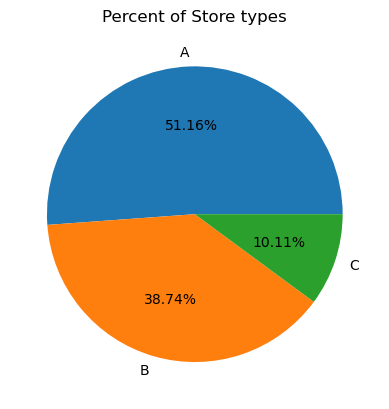

In [19]:
## Categorical Variables -> 'Type', Percentage of stores in each type
values=df_train['Type'].value_counts()
plt.pie(values,labels=df_train['Type'].unique(),autopct='%.2f%%')
plt.title("Percent of Store types")

plt.show()

Concluding that 'Type A' has greater no of stores comparing to others

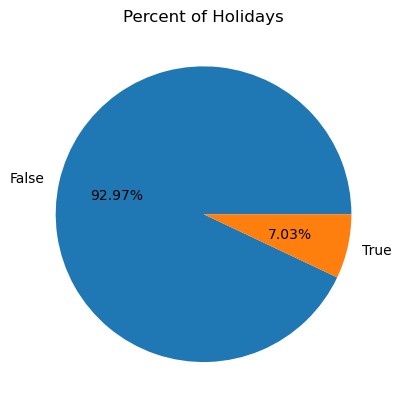

In [20]:
## 'IsHoliday', Percentage of Holidays 
values=df_train['IsHoliday'].value_counts()
plt.pie(values,labels=df_train['IsHoliday'].unique(),autopct='%.2f%%')
plt.title("Percent of Holidays")

plt.show()

the no of Holidays too less

As we can see that the higher positive correlation found in betwee 'Fuel_Price' and 'year'.


<Axes: xlabel='year', ylabel='Fuel_Price'>

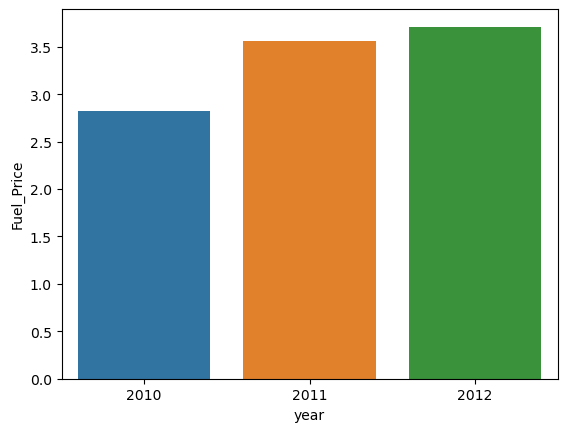

In [21]:
# Barplot bertween 'year' adn 'Fuel_Price'

sns.barplot(x='year',y='Fuel_Price',data=df_train)

 FuelPrices are greatear in 2012 and 2011 when comapared to 2010 which is implying Positive correlation between them

<Axes: xlabel='Store', ylabel='Unemployment'>

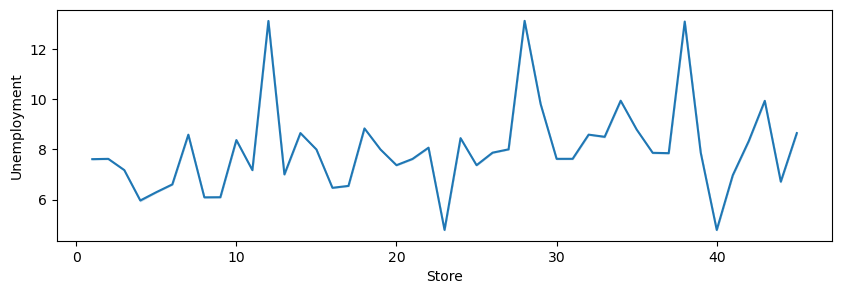

In [22]:
# Relationship of unemployement with the stores

plt.rcParams['figure.figsize']=[10,3]
sns.lineplot(data=df_train,y=df_train.Unemployment,x=df_train.Store) 

Unemployment is almost common in every store

In [23]:
weekly_sales_2010=df_train[df_train['year']==2010]['Weekly_Sales'].groupby(df_train['week']).mean()
weekly_sales_2011=df_train[df_train['year']==2011]['Weekly_Sales'].groupby(df_train['week']).mean()
weekly_sales_2012=df_train[df_train['year']==2012]['Weekly_Sales'].groupby(df_train['week']).mean()

<Axes: xlabel='week'>

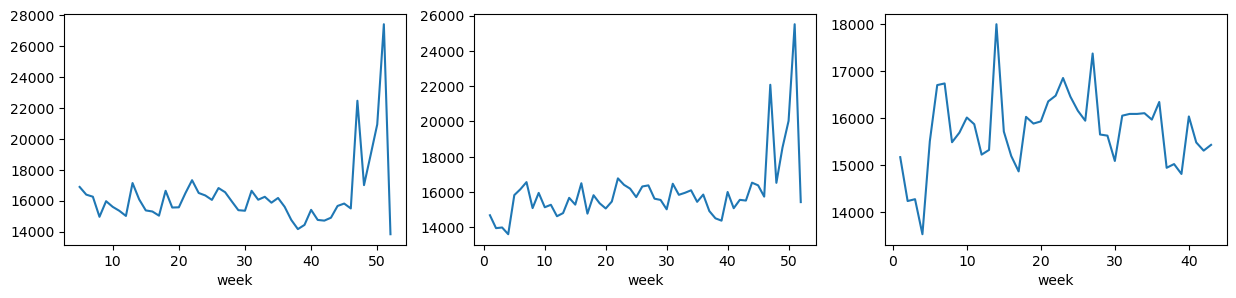

In [24]:
## Average Weekly_Sales per year 

fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(15,3))
plt.subplot(131)
sns.lineplot(data=weekly_sales_2010,x= weekly_sales_2010.index,y=weekly_sales_2010.values)
plt.subplot(132)
sns.lineplot(data=weekly_sales_2011,x= weekly_sales_2011.index,y=weekly_sales_2011.values)
plt.subplot(133)
sns.lineplot(data=weekly_sales_2012,x= weekly_sales_2012.index,y=weekly_sales_2012.values)


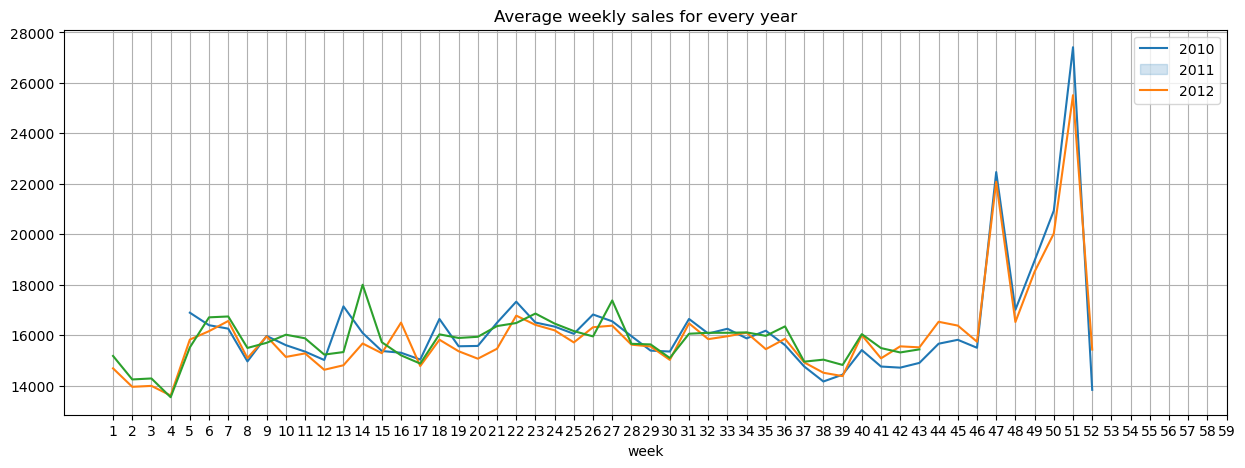

In [25]:
## Combining all of those weekly_sales in every year

plt.rcParams['figure.figsize']=[15,5]
sns.lineplot(data=weekly_sales_2010,x= weekly_sales_2010.index,y=weekly_sales_2010.values)
sns.lineplot(data=weekly_sales_2011,x= weekly_sales_2011.index,y=weekly_sales_2011.values)
sns.lineplot(data=weekly_sales_2012,x= weekly_sales_2012.index,y=weekly_sales_2012.values)
plt.grid()
plt.legend(['2010','2011','2012'],loc='best')
plt.title("Average weekly sales for every year")
plt.xticks(np.arange(1,60))
plt.show()  

This concludes that in every year at the end of it the Weekly_Sales increases

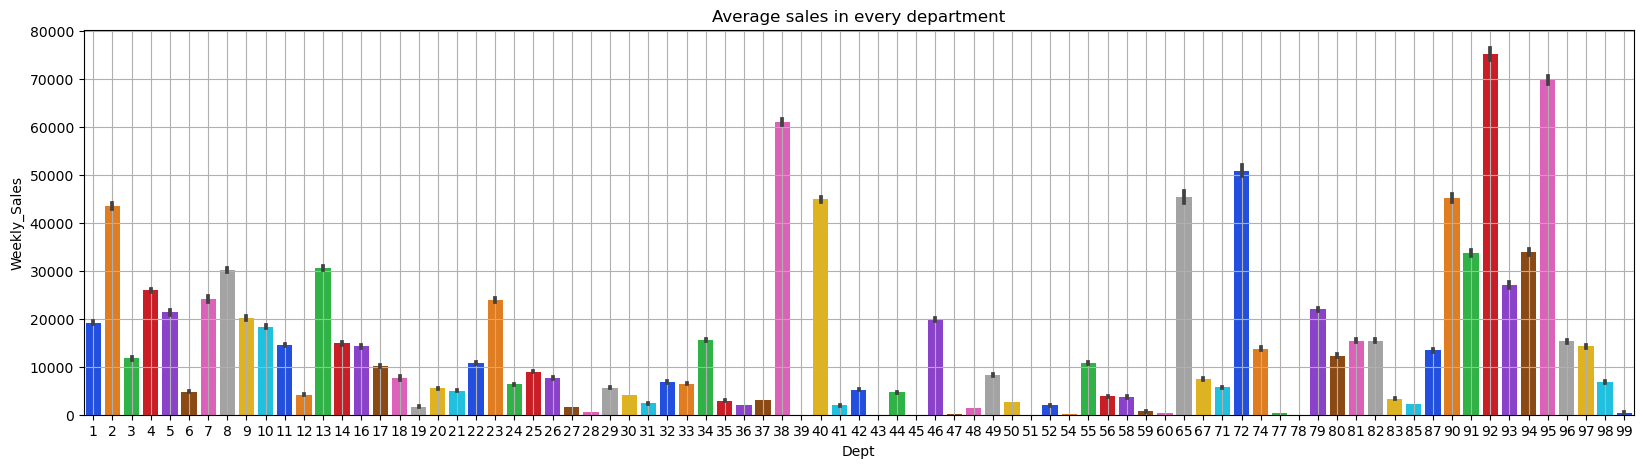

In [26]:
# Average sales in every department

plt.rcParams['figure.figsize']=[20,5]
sns.barplot(data=df_train,x='Dept',y='Weekly_Sales',palette='bright')
plt.grid()
plt.title("Average sales in every department")
plt.show()


Departments have various amounts of weekly_sales

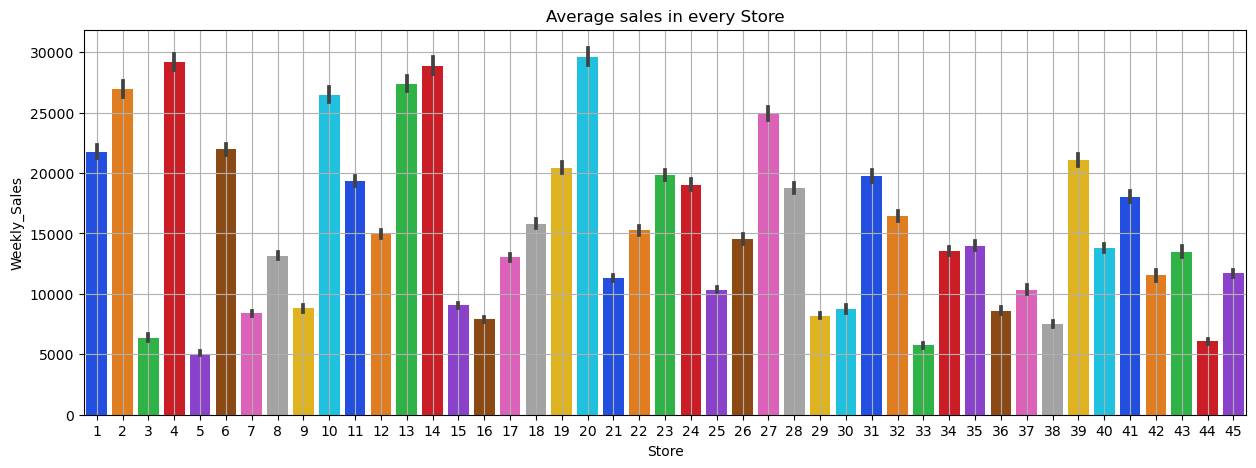

In [27]:
# Barplot between the 'Stores' and the 'Weekly_Sales', Average sales in each store

plt.rcParams['figure.figsize']=[15,5]
sns.barplot(x='Store',y='Weekly_Sales',data=df_train,palette='bright')
plt.grid()
plt.title("Average sales in every Store")
plt.show()


<Axes: >

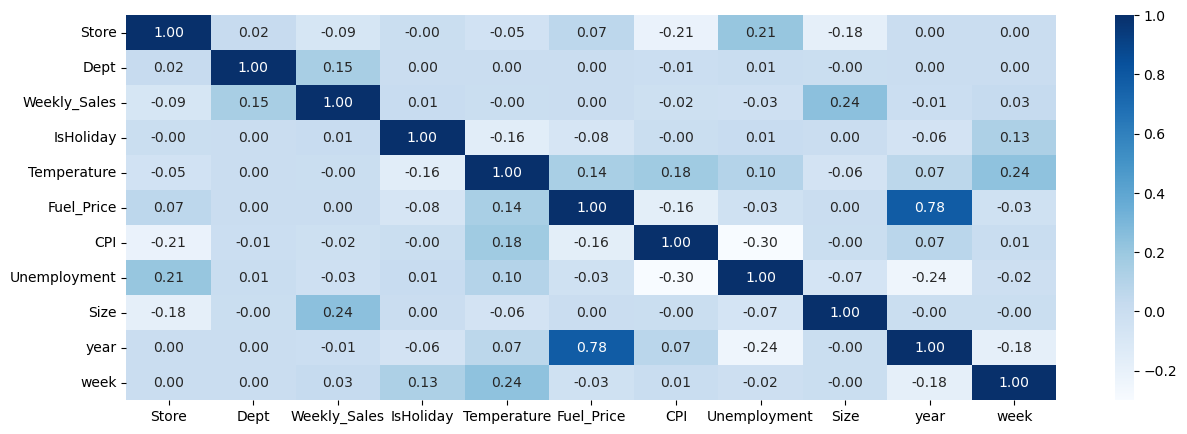

In [28]:
# Correlation between the features using confusion matrix

sns.heatmap(data=df_train.corr(),annot=True,fmt='.2f',cmap='Blues')

#### Conclusion:

- The 'Markdowns' are having almost 60% of Null values hence those are suggested to be dropped
- The 'Date' feature is converted to 'year' and 'week' features as the problem stated that sales depend upon week highly
- As observed that the 'Weekly_Sales' in every year are increaing at the end of the year
- Holidays are too less comparing non-Holidays
- 'Fuel_Price' is highly correlated with the 'year' feature
- 'Size' and 'Dept' are noticably correalated with 'Weekly_Sales'